<h2 style="text-align:center;">Breast Cancer Wisconsin (Diagnostic) Dataset Analysis</h2><br/>
<div style="text-align:center;">
    <p style="text-align:center;">We will train a few decision tree classifiers on the Breast cancer wisconsin(diagnostic) dataset available on Scikit-Learn and compare their performances.</p>
</div>

In [47]:
#First we will load the required libraries
from sklearn.datasets import load_breast_cancer
from tabulate import tabulate
from termcolor import colored
from pathlib import Path
from IPython.display import display, HTML, Image
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from prettytable import PrettyTable

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
import warnings
warnings.filterwarnings("ignore")


<div>
    <p><b>Read the dataset and separate it into a feature matrix X and a class vector y</b></p>
    
</div>

In [48]:
# load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# print the shapes of a feature matrix X and a class vector y
print("Output: Shapes of a feature matrix X and a class vector y")
print("")
print("Feature matrix X shape:", X.shape)  
print("Class vector y shape:", y.shape)

Output: Shapes of a feature matrix X and a class vector y

Feature matrix X shape: (569, 30)
Class vector y shape: (569,)


<div>
    <p><b>Conclusion:</b> <br/>Here we can see that we have seperated our dataset into feature matrix x and class vector y.From the above output we can see that our feature matrix consist of 569 rows and 30 columns, and our class vector y has 569 elements.</p>
    </div>


<div>
    <p><b>Data visualization and Data Cleaning</b></p>
    <ol>
        <li>Here we will inspect our breast cancer dataset.</li>
        <li>We will check for the variables present in our dataset, and we will see if there is a linear relation between two features and we will keep only one feature from it. We will clean the data by dropping unwanted features.
            We will print the correlation table for features with the strongest linear correlation.</li>
        <li>We will display the scatter plot to visualize the top 10 features to show the linear relationship.</li>
    </ol>
</div>

In [49]:
# Data inspection and Visualization
df = pd.DataFrame(data.data, columns=data.feature_names)

# Dataset information in a table format
info_table = PrettyTable(["Column Name", "Non-Null Count", "Data Type"])
info_table.align = "l"

for column in df.columns:
    info_table.add_row([column, df[column].count(), df[column].dtype])

print("Dataset Information:")
print(info_table)



Dataset Information:
+-------------------------+----------------+-----------+
| Column Name             | Non-Null Count | Data Type |
+-------------------------+----------------+-----------+
| mean radius             | 569            | float64   |
| mean texture            | 569            | float64   |
| mean perimeter          | 569            | float64   |
| mean area               | 569            | float64   |
| mean smoothness         | 569            | float64   |
| mean compactness        | 569            | float64   |
| mean concavity          | 569            | float64   |
| mean concave points     | 569            | float64   |
| mean symmetry           | 569            | float64   |
| mean fractal dimension  | 569            | float64   |
| radius error            | 569            | float64   |
| texture error           | 569            | float64   |
| perimeter error         | 569            | float64   |
| area error              | 569            | float64   |
| smoothne

<div>
    <p><b>Conclusion:</b><br/> As we can see from the above output that our dataset has 30 features which can be helpful in diganosis of breast cancer.</p>
    </div>

In [50]:
# The correlation table for features

# Compute the correlation matrix
corr_matrix = X.corr()

# Select features with the strongest linear correlation
strong_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
strong_corr = strong_corr[strong_corr != 1]
strong_corr = strong_corr[strong_corr >= 0.9].reset_index()

# Filter out features not present in both dataframes
strong_corr = strong_corr[strong_corr['level_0'].isin(X.columns) & strong_corr['level_1'].isin(X.columns)]

# Identify only features with a linear relationship
lin_corr = pd.DataFrame(columns=['feature1', 'feature2', 'corr'])
for i in range(len(strong_corr)):
    feature1 = strong_corr.loc[i, 'level_0']
    feature2 = strong_corr.loc[i, 'level_1']
    corr = strong_corr.loc[i, 0]
    if feature1 != feature2:
        if lin_corr.loc[(lin_corr['feature1']==feature2) & (lin_corr['feature2']==feature1)].empty:
            if corr >= 0.7:
                lin_corr = lin_corr.append({'feature1': feature1, 'feature2': feature2, 'corr': corr}, ignore_index=True)

# Sort the lin_corr DataFrame by the corr column in descending order
lin_corr = lin_corr.sort_values(by='corr', ascending=False)

# Filter the lin_corr DataFrame based on corr > 0.9
lin_corr = lin_corr[lin_corr['corr'] > 0.9]

# Print the lin_corr DataFrame
pd.set_option('display.max_rows', None)

# Create a PrettyTable object
corr_table = PrettyTable()
corr_table.field_names = ["Feature 1", "Feature 2", "Correlation"]

# Iterate through the DataFrame and add rows to the table
for _, row in lin_corr.iterrows():
    corr_table.add_row([row['feature1'], row['feature2'], round(row['corr'], 3)])

# Set the alignment for columns
corr_table.align = "l"

# Print the formatted table
print("Output: Correlation table between pairs of features\n")
print(corr_table)

Output: Correlation table between pairs of features

+----------------------+---------------------+-------------+
| Feature 1            | Feature 2           | Correlation |
+----------------------+---------------------+-------------+
| mean radius          | mean perimeter      | 0.998       |
| worst perimeter      | worst radius        | 0.994       |
| mean radius          | mean area           | 0.987       |
| mean perimeter       | mean area           | 0.987       |
| worst radius         | worst area          | 0.984       |
| worst area           | worst perimeter     | 0.978       |
| radius error         | perimeter error     | 0.973       |
| mean perimeter       | worst perimeter     | 0.97        |
| mean radius          | worst radius        | 0.97        |
| mean perimeter       | worst radius        | 0.969       |
| mean radius          | worst perimeter     | 0.965       |
| worst radius         | mean area           | 0.963       |
| mean area            | worst a

<div>
        <p><b>Conclusion:</b><br/>  The above output shows the correlation table between pairs of features in our dataset. We can see from the table that, there are many features which has high correlation coefficent, for e.g. features mean radius and mean perimeter has high correlation(0.998) and hence we can say that the features which are highly correlated , we can only include one feature between them and we will drop the other feature.</p>
    </div>

Output: scatter plot for pair of features with linear relationship



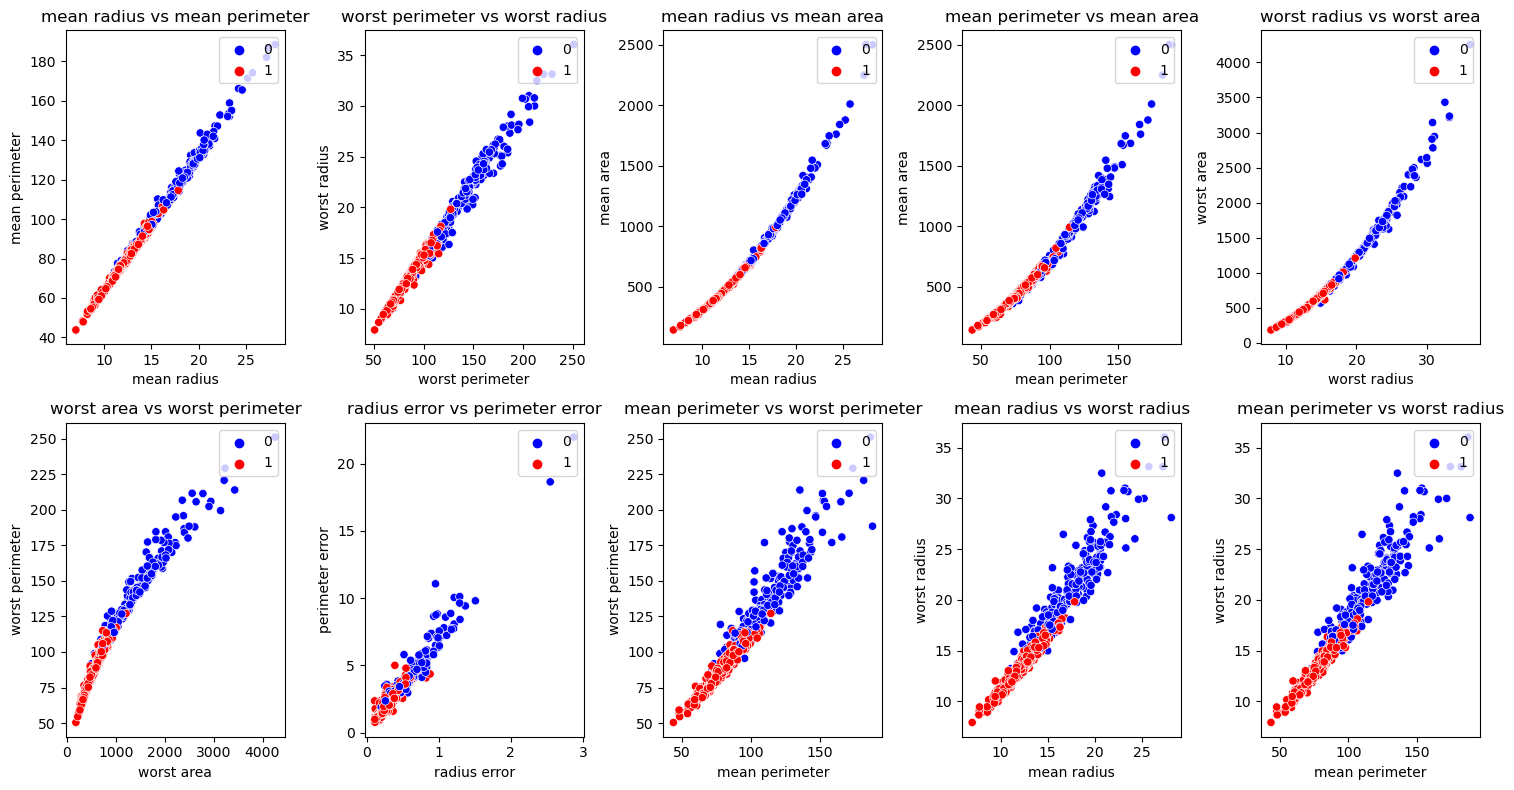

In [51]:
# Scatter plot to visualize the top 10 features to show the linear relationship

# Sort the lin_corr DataFrame by the corr column in descending order
print("Output: scatter plot for pair of features with linear relationship\n")

lin_corr = lin_corr.sort_values(by='corr', ascending=False)

# Filter the lin_corr DataFrame based on corr > 0.9
lin_corr = lin_corr[lin_corr['corr'] > 0.9]

# Select the first 10 rows
lin_corr = lin_corr.head(10)

# Create a figure with 5 columns and 4 rows of subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))


# Loop through the first 10 rows of the lin_corr DataFrame and plot a scatter plot for each pair of features
for i, row in lin_corr.iterrows():
    feature1 = row['feature1']
    feature2 = row['feature2']
    ax = sns.scatterplot(x=X[feature1], y=X[feature2], hue=y, ax=axs[i//5, i%5], palette={0:'blue', 1:'red'})
    ax.set_title(f'{feature1} vs {feature2}')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

<div>
        <p><b>Conclusion:</b><br/> The above scatter plot shows the linear relatinship between top 10 paiwise features.The blue color represents the instances from the class 0 (malignant) and the red color shows the instances from the class 1(benign), the features like worst radius and worst area or mean radius and mean perimeter shows the strong linear realtionship. And hence analysining the ouput from correlation table and scatter plot we will keep only one feature from the strong linear relationship.</p>
 </div>

In [52]:
# Data Cleaning- dropping the unwanted features

def drop_columns(df, drop_clmns):
    return df.drop(drop_clmns, axis=1)
drop_clmns = ['mean perimeter', 'mean concavity', 'radius error', 'area error', 'worst perimeter', 'worst area']
X = drop_columns(X, drop_clmns)

print("Output: Number of columns in X:", X.columns)
print("Number of columns in X:", X.shape[1])


Output: Number of columns in X: Index(['mean radius', 'mean texture', 'mean area', 'mean smoothness',
       'mean compactness', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'texture error', 'perimeter error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'],
      dtype='object')
Number of columns in X: 24


In [53]:
# Split X and y into a training set and a test set using the split ratio 85/15 and random state=123.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

print("Output: Number of instances in the split dataset\n")
print("Number of instances in training set:", X_train.shape[0])
print("Number of instances in test set:", X_test.shape[0])

Output: Number of instances in the split dataset

Number of instances in training set: 483
Number of instances in test set: 86


<div>
        <p><b> Investigate a few decision tree classifiers with different hyperparameter values:
        </b><br/><br/>
            <b> Decision Tree classifier - Default hyperparmeters values</b><br/>
Here we will train a decision tree classifier using the default values for all the hyperparameters and we will use this classifier to make predictions on the training set and the test set, and finally we will compare the accuracy score for the two sets.
        </p>
 </div>

In [54]:

# Train a decision tree classifier using the default values for all the hyperparameters.

clf_d = DecisionTreeClassifier(random_state=123)
clf_d.fit(X_train, y_train)


# Make predictions on the training set and the test set
y_pred_train = clf_d.predict(X_train)
y_pred_test = clf_d.predict(X_test)

# Evaluate the accuracy of the classifier on the training set and the test set
train_accuracy_d = accuracy_score(y_train, y_pred_train)
test_accuracy_d = accuracy_score(y_test, y_pred_test)


# display the results in table format
results = [
    ['Classifier', 'Training Accuracy', 'Test Accuracy'],
    ['Decision Tree classifier with default hyperparameters', f'{train_accuracy_d:.3f}', f'{test_accuracy_d:.3f}'],
     [],
]

# format the first row (headers) with bold text using termcolor
bold_headers = [colored(h, attrs=['bold']) for h in results[0]]

# replace the original headers with the bold headers
results[0] = bold_headers

# print the table

print("Output: The accuracy scores for the Training and Test dataset \n")
print(tabulate(results, headers='firstrow', tablefmt='plain'))


Output: The accuracy scores for the Training and Test dataset 

Classifier                                               Training Accuracy    Test Accuracy
Decision Tree classifier with default hyperparameters                    1            0.919



<div>
        <p><b>Conclusion:</b><br/>
The output shows the training accuracy and testing accuracy for decision tree classifier using default values for all the hyperparameters.
Here we can see that training accuracy is perfect 1 and the test accuracy is slightly lower i.e. 0.9 than the training accuracy, this indicates that our dataset has overfitting issue.
The training accuracy score 1 suggest that the model perfectly fits the training data and slighly lower test accuracy suggest that the model generalizes poorly to the unseen or new data. Hence we can say that due to the overfitting issue the model may memorize the training data very well, so it performs well on the training data set. </p>
    </div>

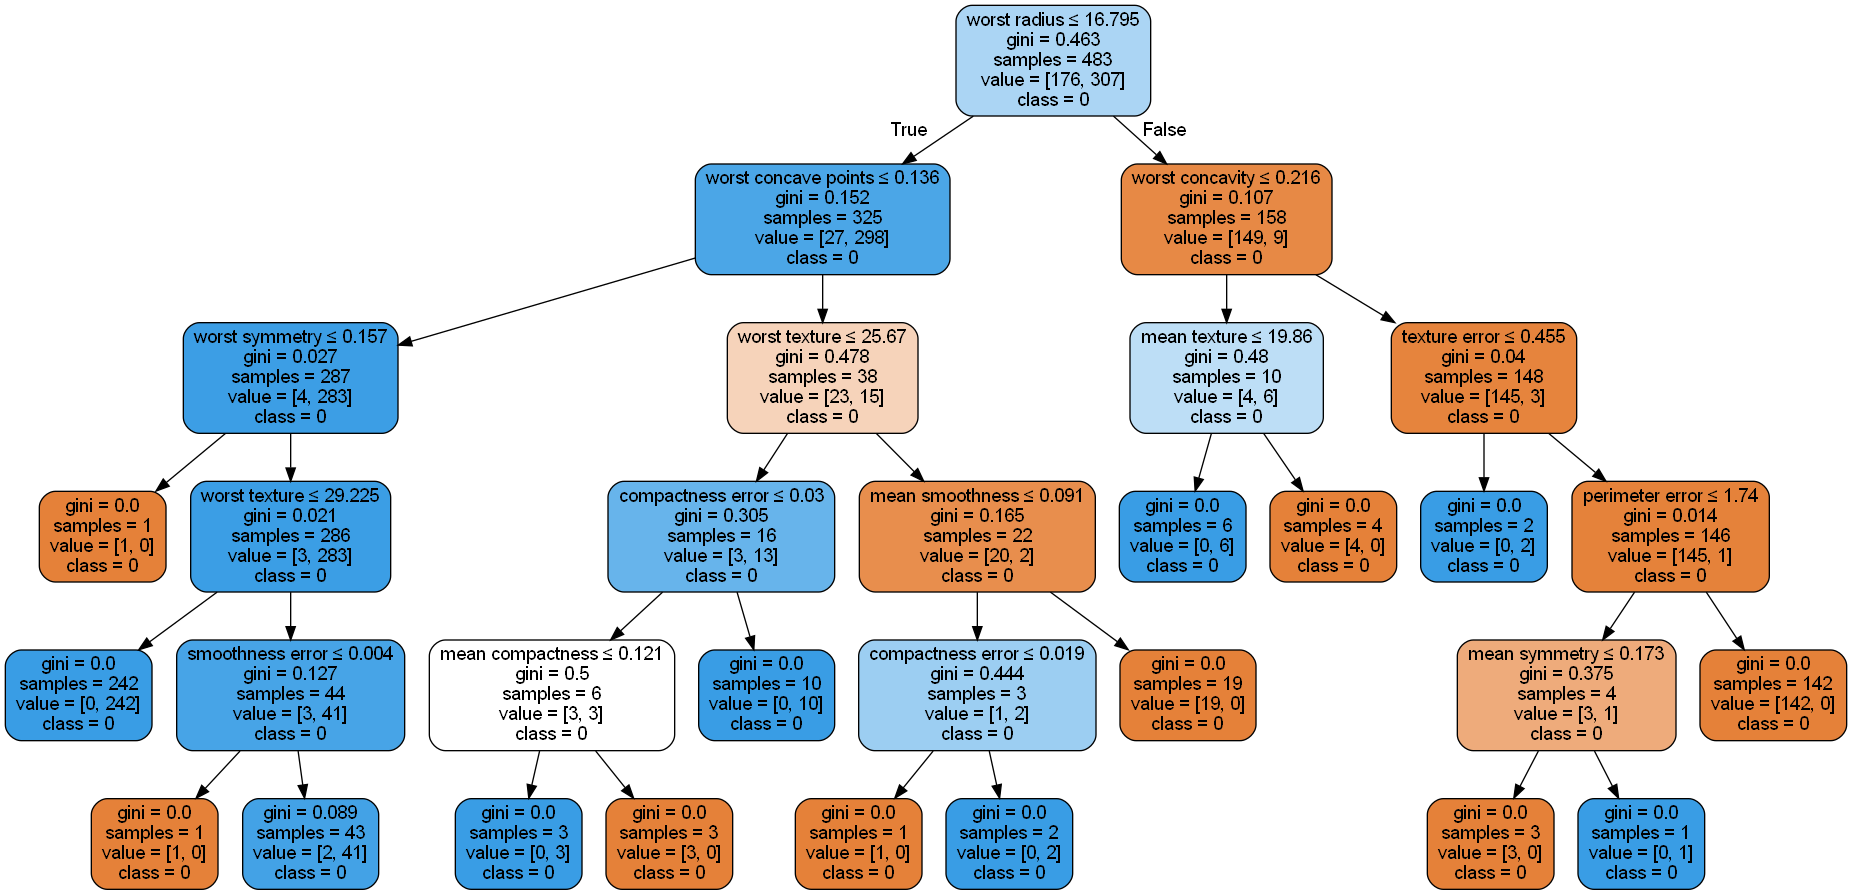

In [55]:
# Decision tree build from the training process

#save the diagram
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=100, fig_size=(8, 6)):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.gcf().set_size_inches(fig_size)
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
clf_max_depth_5 = DecisionTreeClassifier(max_depth=5,random_state=123)
clf_max_depth_5.fit(X_train, y_train)

# Define function to display decision tree
def display_tree(tree, feature_names, class_names, title):
    dot_data = export_graphviz(tree, out_file=None, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render(title, format='png')
    display(HTML(f"<h3><center>{title}</center></h3>"))
    return Image(filename=f"{title}.png", width=900)

# Display decision tree for the classifier

title = f"Output: DecisionTreeClassifier  max depth=5"
display(display_tree(clf_max_depth_5, X.columns, y.astype(str), title))

<div>
        <p><b>Conclusion:</b><br/> The output shows the decision tree diagram and here we have set the max_depth=5 to avoid to display too large diagram.
We can see from the above decision tree diagram that each split is creating a new branch and we can observe that some branches from the training instances contain many sample instances (for e.g. samples=287, samples=38), while some branches has very less instances(e.g.samples=10).Hence we can confirm that our classifier has overfitting issue.
 </p>
    </div>

In [56]:
# A second decision tree classifier by setting the hyperparameter max depth=3

# Train a decision tree classifier using the hyperparameter max depth=3
clf_max_depth_3 = DecisionTreeClassifier(max_depth=3,random_state=123)
clf_max_depth_3.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_pred_train = clf_max_depth_3.predict(X_train)
y_pred_test = clf_max_depth_3.predict(X_test)

# Evaluate the accuracy of the classifier on the training set and the test set
train_accuracy_max_depth_3 = accuracy_score(y_train, y_pred_train)
test_accuracy_max_depth_3 = accuracy_score(y_test, y_pred_test)


# display the results in table format
results_3 = [
    ['Classifier', 'Training Accuracy', 'Test Accuracy'],
    ['Decision Tree classifier with  hyperparameter max_depth=3', f'{train_accuracy_max_depth_3:.3f}', f'{test_accuracy_max_depth_3:.3f}'],
     [],
]

# format the first row (headers) with bold text using termcolor
bold_headers = [colored(h, attrs=['bold']) for h in results_3[0]]

# replace the original headers with the bold headers
results_3[0] = bold_headers

# print the table
print("Output: The accuracy scores for the Training and Test dataset by setting the hyperparameter max depth=3 \n")
print(tabulate(results_3, headers='firstrow', tablefmt='plain'))

Output: The accuracy scores for the Training and Test dataset by setting the hyperparameter max depth=3 

Classifier                                                   Training Accuracy    Test Accuracy
Decision Tree classifier with  hyperparameter max_depth=3                0.981            0.953



<div>
        <p><b>Conclusion:</b><br/>Here we have constructed the second decision tree classifier by setting the hyperparameter max_depth=3. From this classifier we have obtained the trainging accuracy 0.98 which is slightly lower than the previous classifier which has training accuracy 1.<br/><br/>The test accuracy for our second decision tree classifier is 0.95 which is more than the previous classifier test accuarcy 0.919<br/><br/>As we have set the maximum depth 3 here,to reduce the model complexity and to prevent the overfitting the training data.Though the traing accuracy is still high i.e. 0.98 and the test accuracy is also high 0.95 this indicates that our model has started generalizing the unseen data very well.
             </p>
    </div>

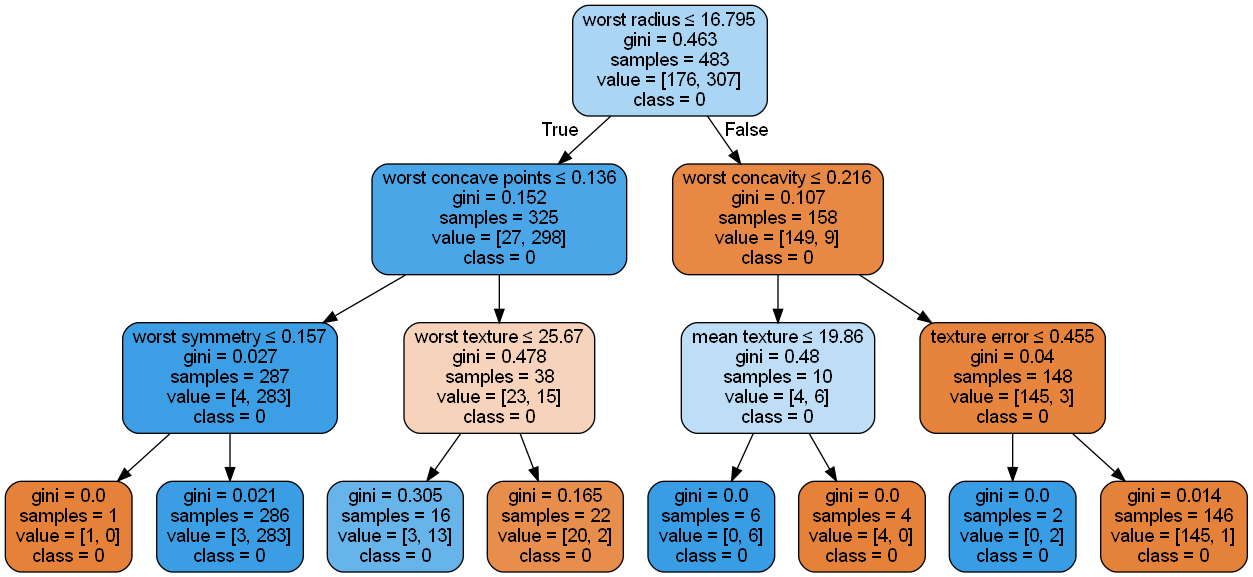

In [57]:
# Display decision tree for the classifier

title = f"Output: Decision Tree diagram DecisionTree Classifier  max depth=3"
display(display_tree(clf_max_depth_3, X.columns, y.astype(str), title))


<div>
        <p><b>Conclusion:</b><br/>we can see from the above output of Decision Tree diagram DecisionTree Classifier max depth=3, that restricting the maximum depth to 3 gave us a decision tree which has less number of branches and splits. </p>
    </div>

In [58]:
# A third decision tree classifier by setting the hyperparameter min samples split=5
clf_min_samples_5 = DecisionTreeClassifier(min_samples_split=5,random_state=123)
clf_min_samples_5.fit(X_train, y_train)

# Make predictions on the training set and the test set
y_pred_train = clf_min_samples_5.predict(X_train)
y_pred_test = clf_min_samples_5.predict(X_test)

# Evaluate the accuracy of the classifier on the training set and the test set
train_accuracy_d_5 = accuracy_score(y_train, y_pred_train)
test_accuracy_d_5 = accuracy_score(y_test, y_pred_test)


# display the results in table format
results_5 = [
    ['Classifier', 'Training Accuracy', 'Test Accuracy'],
    ['Decision Tree classifier with hyperparameter min_samples_split=5', f'{train_accuracy_d_5:.3f}', f'{test_accuracy_d_5:.3f}'],
     [],
]

# format the first row (headers) with bold text using termcolor
bold_headers = [colored(h, attrs=['bold']) for h in results_5[0]]

# replace the original headers with the bold headers
results_5[0] = bold_headers

# print the table

print("Output: The accuracy scores for the Training and Test dataset by setting the hyperparameter min_samples split=5 \n")
print(tabulate(results_5, headers='firstrow', tablefmt='plain'))

Output: The accuracy scores for the Training and Test dataset by setting the hyperparameter min_samples split=5 

Classifier                                                          Training Accuracy    Test Accuracy
Decision Tree classifier with hyperparameter min_samples_split=5                0.996             0.93




<div>
        <p><b>Conclusion:</b><br/>Here we have constructed our third decision tree classifier by setting the hyperparameter min samples split=5<br/><br/>
As we have restricted the minimum number of samples required to split a node to 5, this will help to reduce the complexity of the tree and hence it will help to prevent the overfitting of the data.<br/><br/>
From the above output we can see that our classifier has the training accuracy 0.99 which is slightly higher than our second classifier(0.98) but less than first classifier(1). Our third classifier has lower test accuracy (0.93) which is less than previously constructed clasifier 0.95 but more than our first classifier test accuracy(0.91).<br/><br/>
Our third decision tree classifier still has high accuracy 0.99 but low test accuracy 0.93, this indicates that this model still has the overfitting issue. </p>
    </div>

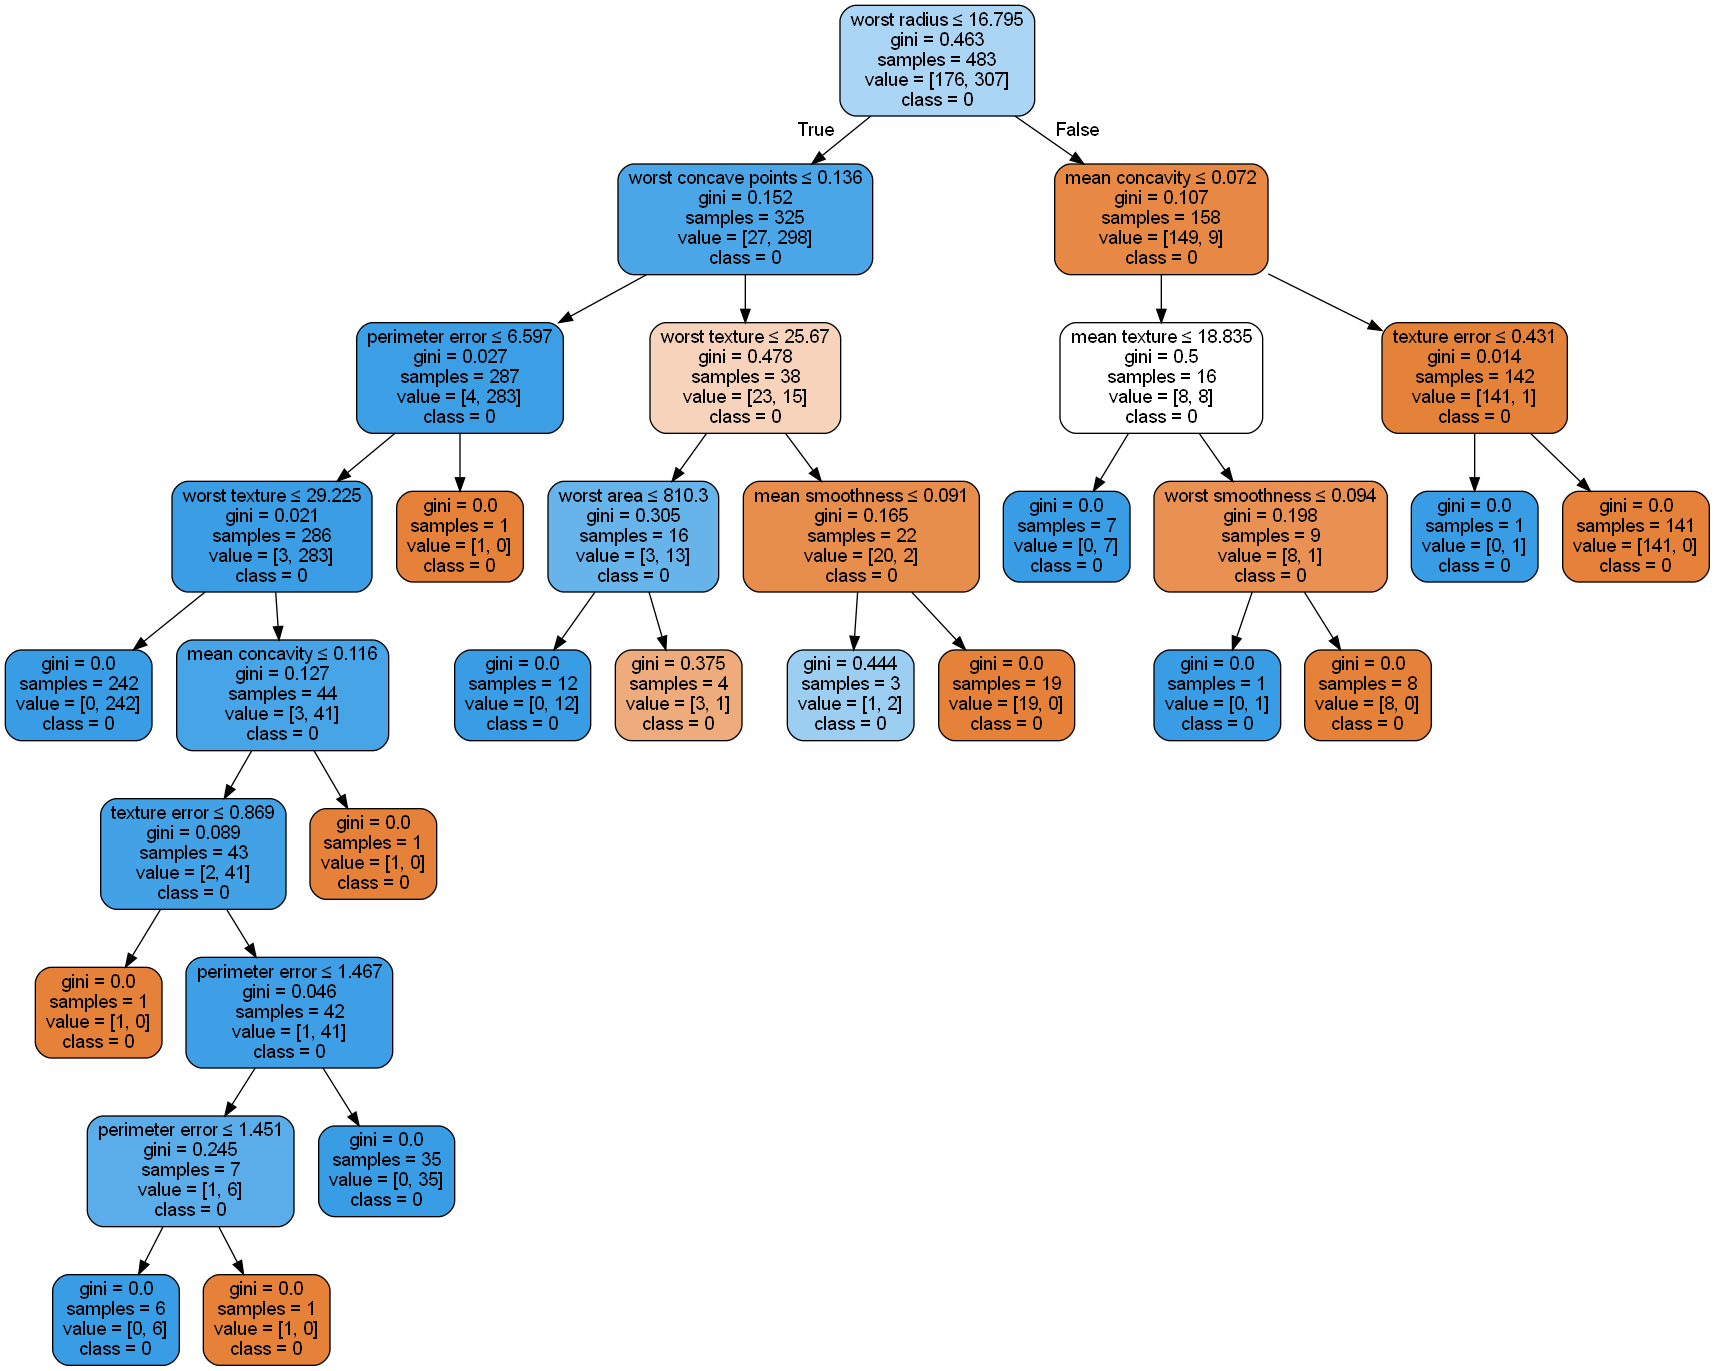

In [43]:
# Display decision tree for the classifier

title = f"Output: Decision Tree diagram DecisionTree Classifier min_samples split=5 "
display(display_tree(clf_min_samples_5, X.columns, y.astype(str), title))

In [59]:
# A fourth decision tree classifier by setting the hyperparameter min samples leaf=5
clf_min_samples_leaf_5 = DecisionTreeClassifier(min_samples_leaf=5,random_state=123)
clf_min_samples_leaf_5.fit(X_train, y_train)

y_pred_train = clf_min_samples_leaf_5.predict(X_train)
y_pred_test = clf_min_samples_leaf_5.predict(X_test)

# Evaluate the accuracy of the classifier on the training set and the test set
train_accuracy_d_leaf_5 = accuracy_score(y_train, y_pred_train)
test_accuracy_d_leaf_5 = accuracy_score(y_test, y_pred_test)


# display the results in table format
results_leaf_5 = [
    ['Classifier', 'Training Accuracy', 'Test Accuracy'],
    ['Decision Tree classifier with hyperparameter min_samples_leaf=5', f'{train_accuracy_d_leaf_5:.3f}', f'{test_accuracy_d_leaf_5:.3f}'],
     [],

]
# format the first row (headers) with bold text using termcolor
bold_headers = [colored(h, attrs=['bold']) for h in results_5[0]]

# replace the original headers with the bold headers
results_leaf_5[0] = bold_headers
# print the table

print("Output: The accuracy scores for the Training and Test dataset by setting the hyperparameter min samples leaf=5 \n")
print(tabulate(results_leaf_5, headers='firstrow', tablefmt='plain'))

Output: The accuracy scores for the Training and Test dataset by setting the hyperparameter min samples leaf=5 

Classifier                                                         Training Accuracy    Test Accuracy
Decision Tree classifier with hyperparameter min_samples_leaf=5                0.973            0.942



<div>
        <p><b>Conclusion:</b><br/>Now we have constructed our fourth decision tree classifier by setting the hyperparameter min samples leaf=5<br/><br/>
Here our training accuracy is 0.97 which is lowest from all the previous decision tree classfier we have constructed.This indicates that our model is not fitting the training data closely as we have set the  hyperparameter min samples leaf=5 because of this , the model can not stop splitting the node early.<br/><br/>
The test accuracy for our clasifier is 0.94 which is also good as compare to previous classifiers and hence we can say that , the model is performing well on test dataset. </p>
    </div>

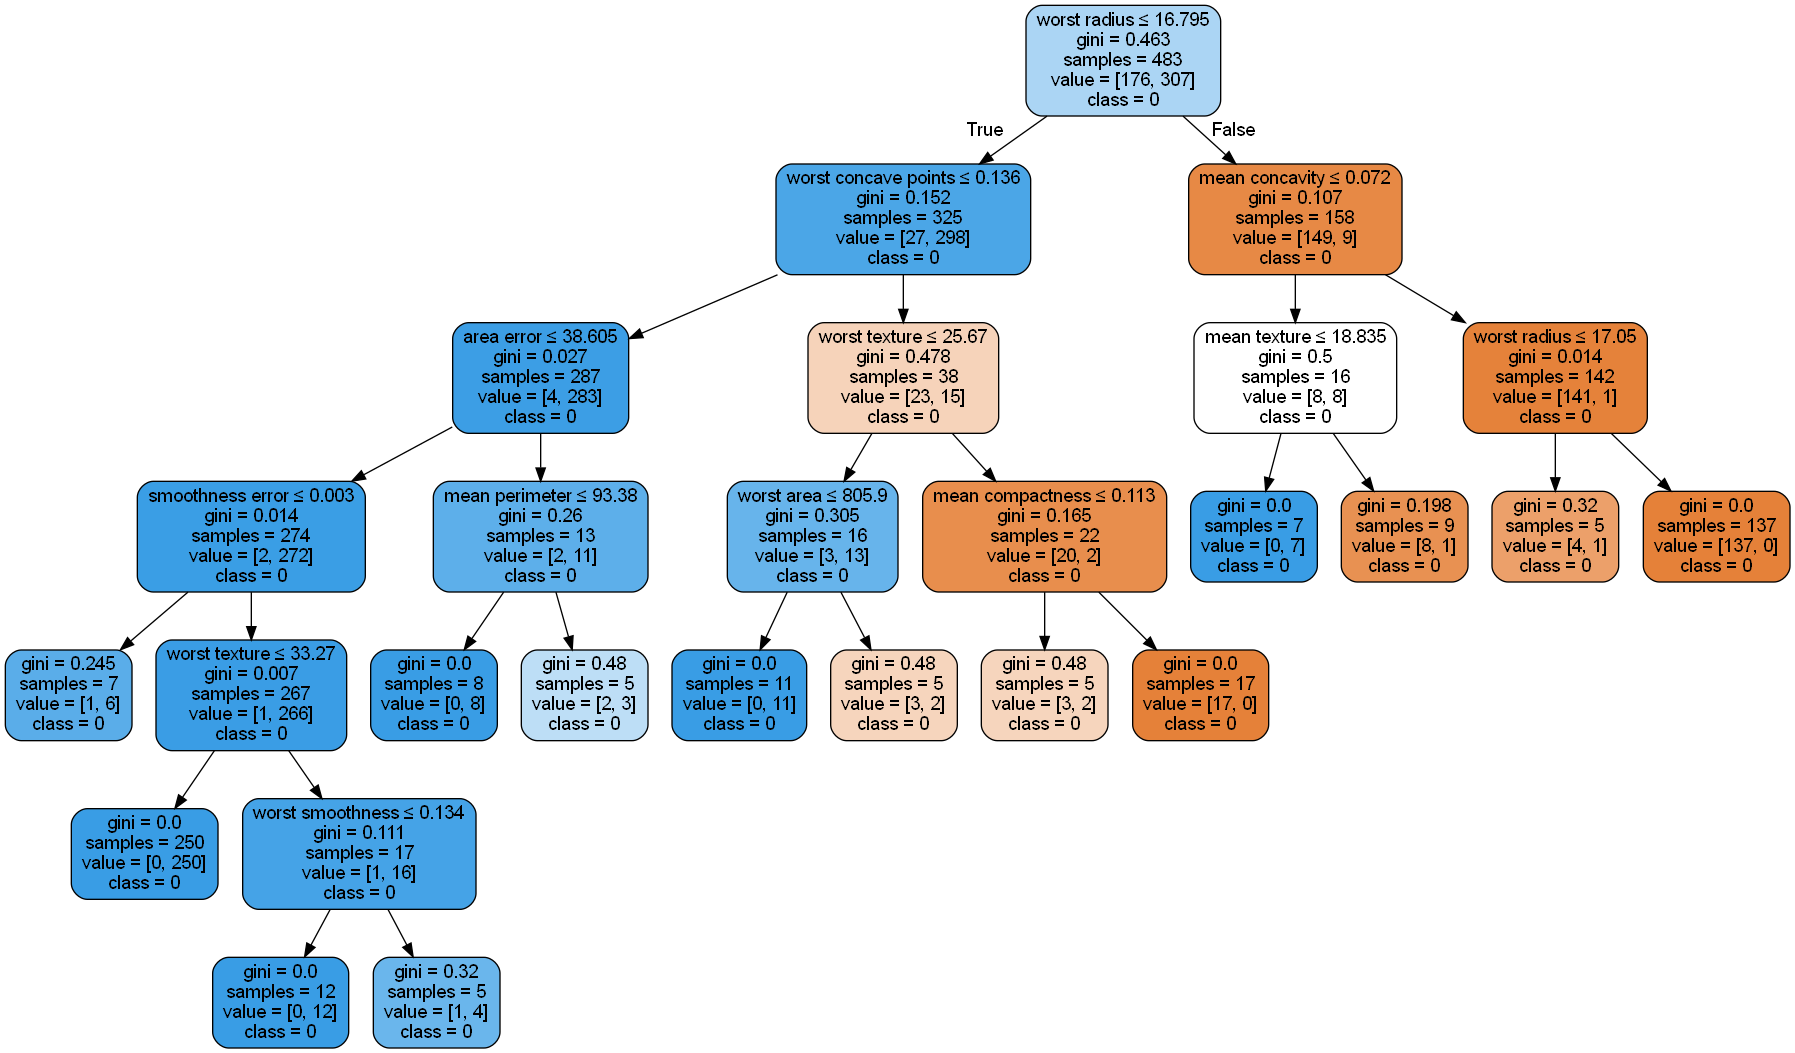

In [45]:
# Display decision tree for classifier min samples leaf=5

title = f"Output: Decision Tree diagram DecisionTree Classifier min samples leaf=5 "
display(display_tree(clf_min_samples_leaf_5, X.columns, y.astype(str), title))

Output: Performance metrics table



train_accuracy  \
classifier             hyperparameter    best_value                   
DecisionTreeClassifier max_depth         3                 0.981366   
                       min_samples_split 3                 1.000000   
                       min_samples_leaf  4                 0.975155   

                                                     train_precision  \
classifier             hyperparameter    best_value                    
DecisionTreeClassifier max_depth         3                  0.981379   
                       min_samples_split 3                  1.000000   
                       min_samples_leaf  4                  0.975414   

                                                     train_recall  \
classifier             hyperparameter    best_value                 
DecisionTreeClassifier max_depth         3               0.981366   
                       min_samples_split 3               1.000000   
                       min_samples_leaf  4               0.975155   

                                                     test_accuracy  \
classifier             hyperparameter    best_value                  
DecisionTreeClassifier max_depth         3                0.953488   
                       min_samples_split 3                0.941860   
                       min_samples_leaf  4                0.941860   

                                                     test_precision  \
classifier             hyperparameter    best_value                   
DecisionTreeClassifier max_depth         3                 0.954146   
                       min_samples_split 3                 0.941880   
                       min_samples_leaf  4                 0.944696   

                                                     test_recall  
classifier             hyperparameter    best_value               
DecisionTreeClassifier max_depth         3              0.953488  
                       min_samples_split 3              0.941860  
                       min_samples_leaf  4              0.941860


Output: Confusion matrices for training and test dataset for best hyperparameter values





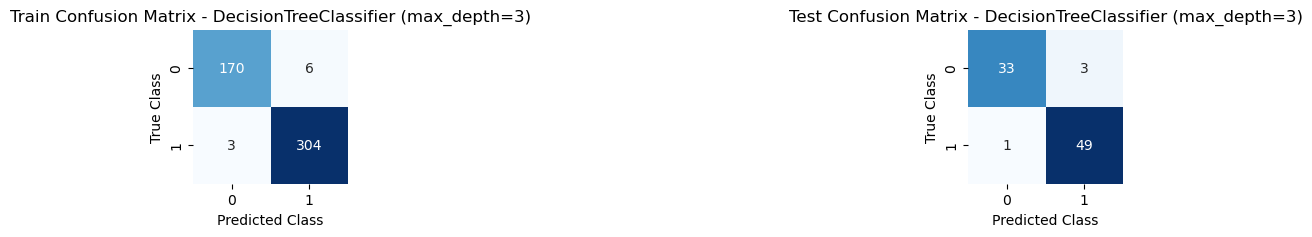

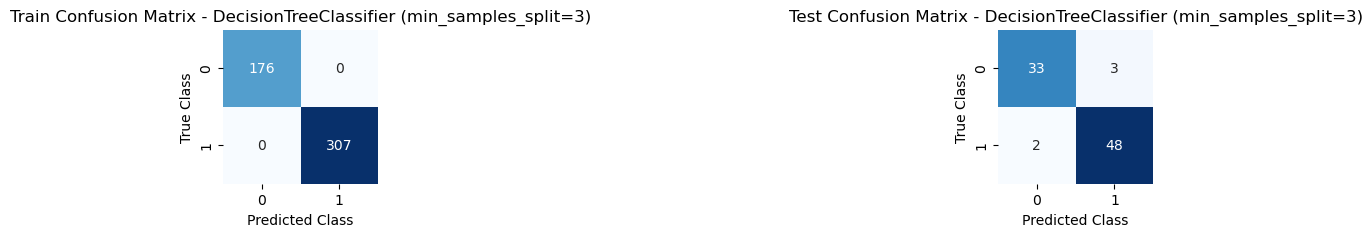

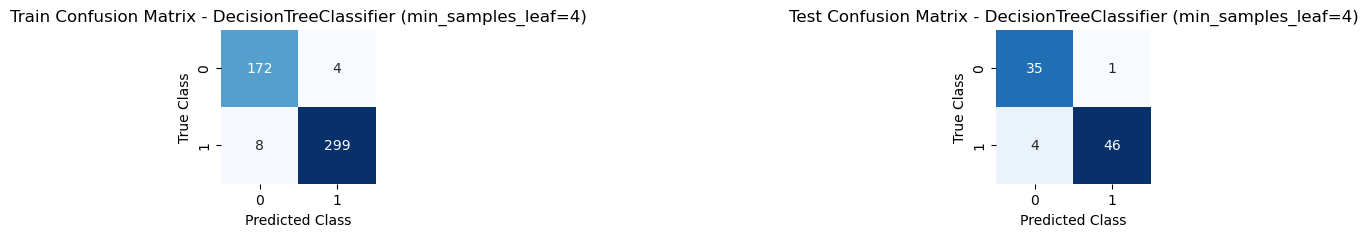

In [60]:
# A 3-fold cross-validation and grid-search to find the best combination of these hyperparameters (max depth, min samples split and min samples leaf).


# define the parameter grids to search over
param_grids = [    
    {'classifier': ['DecisionTreeClassifier'], 'hyperparameters': {'max_depth': [2, 3, 4, 5]}},
    {'classifier': ['DecisionTreeClassifier'], 'hyperparameters': {'min_samples_split': [2, 3, 4, 5]}},
    {'classifier': ['DecisionTreeClassifier'], 'hyperparameters': {'min_samples_leaf': [2, 3, 4, 5]}}
]

results = []

# loop over the parameter grids and perform the grid search
for param_grid in param_grids:
    clf = GridSearchCV(estimator=eval(param_grid['classifier'][0])(), param_grid=param_grid['hyperparameters'], cv=3)
    clf.fit(X_train, y_train)
    best_params = clf.best_params_
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_precision, train_recall, _, _ = precision_recall_fscore_support(y_train, y_train_pred, average='weighted')
    test_precision, test_recall, _, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    results.append({
        'classifier': param_grid['classifier'][0],
        'hyperparameter': list(best_params.keys())[0],
        'best_value': best_params[list(best_params.keys())[0]],
        'train_accuracy': train_accuracy,
        'train_precision': train_precision,
        'train_recall': train_recall,
        'test_accuracy': test_accuracy,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'train_conf_matrix': train_conf_matrix,
        'test_conf_matrix': test_conf_matrix
    })

# create a pandas dataframe from the results and display as table
results_df = pd.DataFrame(results)
results_df.set_index(['classifier', 'hyperparameter', 'best_value'], inplace=True)
results_df = results_df[['train_accuracy','train_precision', 'train_recall','test_accuracy', 'test_precision', 'test_recall']]
print("Output: Performance metrics table\n")


display(results_df)
print("")
print("Output: Confusion matrices for training and test dataset for best hyperparameter values\n")

# print confusion matrix and classification report for each classifier

for result in results:
    clf_name = result['classifier']
    hyperparameter = result['hyperparameter']
    best_value = result['best_value']
    train_conf_matrix = result['train_conf_matrix']
    test_conf_matrix = result['test_conf_matrix']
    classes = np.unique(y_train)

   # plot the train and test confusion matrix side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 2))
    sns.heatmap(train_conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes, ax=ax1, cbar=False)
    ax1.set_title(f'Train Confusion Matrix - {clf_name} ({hyperparameter}={best_value})')
    print("")

    ax1.set_xlabel('Predicted Class')
    ax1.set_ylabel('True Class')
    print("")

    sns.heatmap(test_conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes, ax=ax2, cbar=False)
    ax2.set_title(f'Test Confusion Matrix - {clf_name} ({hyperparameter}={best_value})')
    ax2.set_xlabel('Predicted Class')
    ax2.set_ylabel('True Class')

    plt.subplots_adjust(wspace=4)
    plt.show()


<div>
        <p><b>Conclusion:</b><br/>Performance  metrics table shows the output for the best hyperparameter values for training and test dataset. We can see from this table that best value for hyperparameter min_samples_split performance well on the training dataset compare to hyperparameter max_depth and min_samples leaf while for the best value of mean_samples_leaf hyperparmeter performace well on test set compare to other hyperparameter.<br/><br/>
Overall the table suggests that the best hyperparmeter values for all the hyperparmeters shows the accuracy, precision, recall values are  0.9 on training as well as test dataset.<br/><br/>
Hence we can conclude that our decision tree classifier is performing well on the dataset , with high accuracy, precision and recall scores.<br/>
The confusion matrices output shows that some of the class 0 instances are classified as class 1 and some of the class 1 instances are predicted as class 0 due to the overfitting issue.<br/><br/>

If we compare our performance with best hyperparameter Decision tree classifier and all our previous classifiers i.e. decision tree classifier with default hyperparameters , max_depth=3, min_samples_split=5 and min_samples_leaf=5 , we can conclude that our best hyperparmeter classifiers are performing well than these classifiers and it indicates the best hyperparameter classifier helped to improve the generalization of the model. </p>
    </div>